# Player Analysis

In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [403]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [404]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [405]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','dl_applied','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','bye_runs', 'legbye_runs','noball_runs','penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 26)

In [406]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,0,0,0,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,1,Sunrisers Hyderabad,...,2,0,0,0,0,0,2,2,NaN,NaN


## Taking in consideration only MI VS RCB matches

In [407]:
RCB_MI=matches[np.logical_or(np.logical_and(matches['team1']=='Royal Challengers Bangalore',matches['team2']=='Mumbai Indians'),
                            np.logical_and(matches['team2']=='Royal Challengers Bangalore',matches['team1']=='Mumbai Indians'))]
RCB_MI = RCB_MI[RCB_MI["dl_applied"]==0]

cond1 = RCB_MI["season"]==2014
cond2 = RCB_MI["season"]==2015
cond3 = RCB_MI["season"]==2016
cond4 = RCB_MI["season"]==2017
cond5 = RCB_MI["season"]==2018
cond6 = RCB_MI["season"]==2019
RCB_MI = RCB_MI[cond1|cond2|cond3|cond4|cond5|cond6]

RCB_MI = RCB_MI[(RCB_MI["dismissal_kind"]!="run out")&(RCB_MI["dismissal_kind"]!="retired hurt")]

RCB_MI.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
2589,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,...,0,0,0,0,0,1,0,1,NaN,NaN
2590,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,...,1,0,0,0,0,0,1,1,NaN,NaN
2591,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,...,0,0,0,0,0,1,0,1,NaN,NaN
2592,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,...,0,0,0,0,0,1,0,1,NaN,NaN
2593,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,...,0,0,0,0,0,0,0,0,NaN,NaN


In [408]:
RCB_MI.match_id.nunique()

12

In [409]:
RCB_MI.season.unique()

array([2017, 2014, 2015, 2016, 2018, 2019], dtype=int64)

## Bowler to take 2 or more wickets in the match

### First Innings

In [410]:
first = RCB_MI[RCB_MI["inning"]==1]

- Royal Challengers Bangalore

In [411]:
rcb = first[first["bowling_team"]=="Royal Challengers Bangalore"]

In [412]:
wickets = pd.DataFrame(rcb.groupby(["season","match_id","bowler"])["dismissal_kind"].count())

wickets.columns = ["wicket"]

print("Wickets taken by RCB bowlers match wise :")

wickets.head()

Wickets taken by RCB bowlers match wise :


wicket
season match_id bowler           
2014   462      AB Dinda        1
                JA Morkel       1
                MA Starc        2
                VR Aaron        2
                YS Chahal       2

- 2 or more wickets

In [413]:
condition = wickets[wickets["wicket"]>=2]

condition.reset_index(inplace = True)

condition

,season,match_id,bowler,wicket
0,2014,462,MA Starc,2
1,2014,462,VR Aaron,2
2,2014,462,YS Chahal,2
3,2015,534,D Wiese,4
4,2015,534,YS Chahal,2
5,2018,7907,CJ Anderson,2
6,2018,7907,UT Yadav,2
7,2019,11143,Mohammed Siraj,2
8,2019,11143,UT Yadav,2
9,2019,11143,YS Chahal,4


Text(0.5, 1.0, 'Bowler with 2 or more wickets for RCB')

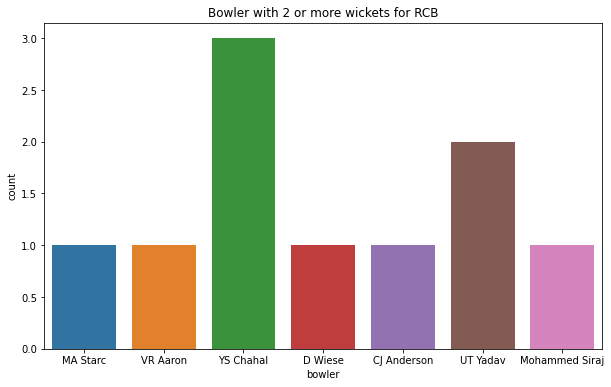

In [414]:
plt.figure(figsize = (10,6))
sns.countplot(condition["bowler"])
plt.title("Bowler with 2 or more wickets for RCB")

##### Other RCB Bowlers

- Washington Sundar (Overall)

In [415]:
sundar = matches[(matches["batting_team"]=="Mumbai Indians")&(matches["bowler"]=="Washington Sundar")]

In [416]:
sundar_first = sundar[sundar["inning"]==1]

In [417]:
sundar_wickets = pd.DataFrame(sundar_first.groupby(["season","match_id","batting_team"])["dismissal_kind"].count())

sundar_wickets.columns = ["wicket"]

print("Wickets taken by Sundar against MI overall: ")

sundar_wickets

Wickets taken by Sundar against MI overall: 


,,,wicket
season,match_id,batting_team,
2017,59,Mumbai Indians,0
2018,7907,Mumbai Indians,0


- Chriss Morris (Overall)

In [418]:
chris = matches[(matches["batting_team"]=="Mumbai Indians")&(matches["bowler"]=="CH Morris")]

In [419]:
chris_first = chris[chris["inning"]==1]

In [420]:
chris_wickets = pd.DataFrame(chris_first.groupby(["season","match_id","batting_team"])["dismissal_kind"].count())

chris_wickets.columns = ["wicket"]

print("Wickets taken by Morris against MI overall: ")

chris_wickets

Wickets taken by Morris against MI overall: 


wicket
season match_id batting_team          
2013   430      Mumbai Indians       0
       457      Mumbai Indians       2
2015   526      Mumbai Indians       1
2016   623      Mumbai Indians       2
2017   24       Mumbai Indians       2
2019   11325    Mumbai Indians       0

Overall, Morris has taken 2 wickets against MI 3 times out of 6 times he has bowled in the first innings.

- Navdeep Saini (overall)

In [421]:
saini = matches[(matches["batting_team"]=="Mumbai Indians")&(matches["bowler"]=="N Saini")]

In [422]:
saini_first = saini[saini["inning"]==1]

In [423]:
saini_wickets = pd.DataFrame(saini_first.groupby(["season","match_id","batting_team"])["dismissal_kind"].count())

saini_wickets.columns = ["wicket"]

print("Wickets taken by Saini against MI overall: ")

saini_wickets

Wickets taken by Saini against MI overall: 


,,,wicket
season,match_id,batting_team,
2019,11143,Mumbai Indians,0


- Mumbai Indians

In [424]:
mi = first[first["bowling_team"]=="Mumbai Indians"]

In [425]:
wickets = pd.DataFrame(mi.groupby(["season","match_id","bowler"])["dismissal_kind"].count())

wickets.columns = ["wicket"]

print("Wickets taken by MI bowlers match wise :")

wickets.head()

Wickets taken by MI bowlers match wise :


wicket
season match_id bowler                 
2015   562      HH Pandya             0
                Harbhajan Singh       0
                J Suchith             0
                JJ Bumrah             0
                MJ McClenaghan        0

- 2 or more wickets

In [426]:
condition = wickets[wickets["wicket"]>=2]

condition.reset_index(inplace = True)

condition

,season,match_id,bowler,wicket
0,2016,590,JJ Bumrah,3
1,2016,590,KH Pandya,2
2,2017,12,MJ McClenaghan,2
3,2017,37,KH Pandya,2
4,2017,37,MJ McClenaghan,3
5,2018,7924,HH Pandya,3
6,2019,11322,SL Malinga,4


Text(0.5, 1.0, 'Bowler count with 2 or more wickets for MI')

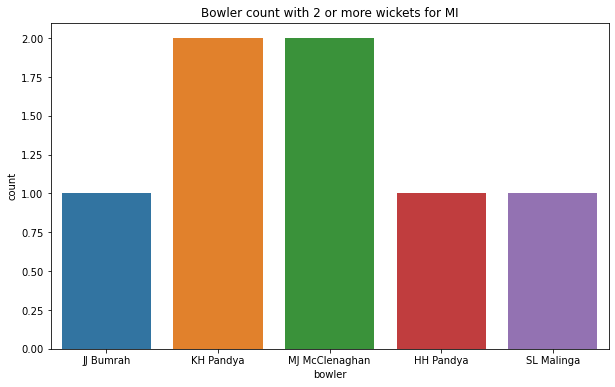

In [427]:
plt.figure(figsize = (10,6))
sns.countplot(condition["bowler"])
plt.title("Bowler count with 2 or more wickets for MI")

##### Other MI Bowlers

- Trent Boult (Overall)

In [428]:
boult = matches[(matches["batting_team"]=="Royal Challengers Bangalore")&(matches["bowler"]=="TA Boult")]

In [429]:
boult_first = boult[boult["inning"]==1]

In [430]:
boult_wickets = pd.DataFrame(boult_first.groupby(["season","match_id","batting_team"])["dismissal_kind"].count())

boult_wickets.columns = ["wicket"]

print("Wickets taken by Boult against MI overall: ")

boult_wickets

Wickets taken by Boult against MI overall: 


,,,wicket
season,match_id,batting_team,
2015,525,Royal Challengers Bangalore,3


- Coulter Nile

In [431]:
coulter = matches[(matches["batting_team"]=="Royal Challengers Bangalore")&(matches["bowler"]=="NM Coulter-Nile")]

In [432]:
coulter_first = coulter[coulter["inning"]==1]

coulter_first.match_id.nunique()

0

### Second Innings


In [433]:
second = RCB_MI[RCB_MI["inning"]==2]

- Royal Challengers Bangalore

In [434]:
rcb = second[second["bowling_team"]=="Royal Challengers Bangalore"]

In [435]:
wickets = pd.DataFrame(rcb.groupby(["season","match_id","bowler"])["dismissal_kind"].count())

wickets.columns = ["wicket"]

print("Wickets taken by RCB bowlers match wise :")

wickets.head()

Wickets taken by RCB bowlers match wise :


wicket
season match_id bowler           
2015   562      D Wiese         0
                HV Patel        2
                MA Starc        1
                S Aravind       1
                YS Chahal       2

In [436]:
condition = wickets[wickets["wicket"]>=2]

condition.reset_index(inplace = True)

condition

,season,match_id,bowler,wicket
0,2015,562,HV Patel,2
1,2015,562,YS Chahal,2
2,2016,590,Iqbal Abdulla,3
3,2016,617,VR Aaron,2
4,2017,12,S Badree,4
5,2017,37,P Negi,2
6,2018,7924,Mohammed Siraj,2
7,2018,7924,TG Southee,2
8,2018,7924,UT Yadav,2
9,2019,11322,M Ali,2


Text(0.5, 1.0, 'Bowler count with 2 or more wickets for RCB')

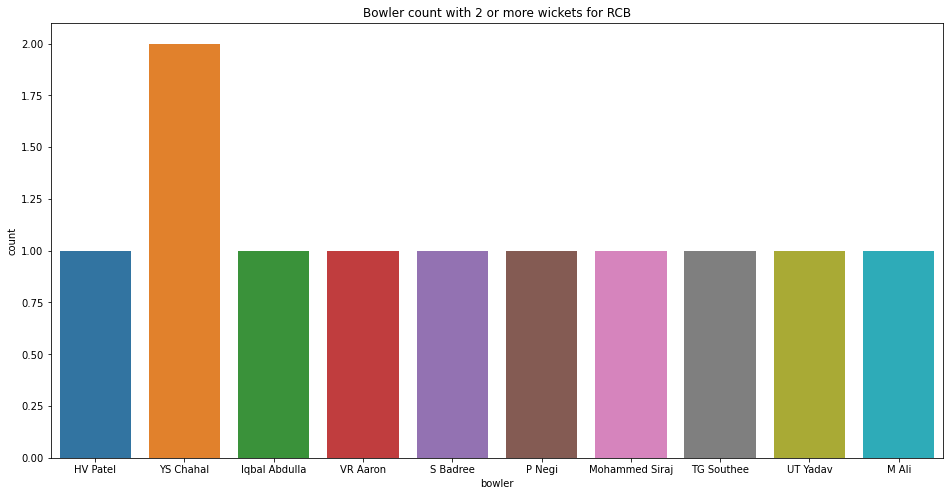

In [437]:
plt.figure(figsize = (16,8))
sns.countplot(condition["bowler"])
plt.title("Bowler count with 2 or more wickets for RCB")

##### Other RCB Bowlers

- Washington Sundar (Overall)

In [438]:
sundar = matches[(matches["batting_team"]=="Mumbai Indians")&(matches["bowler"]=="Washington Sundar")]

In [439]:
sundar_second = sundar[sundar["inning"]==2]

In [440]:
sundar_wickets = pd.DataFrame(sundar_second.groupby(["season","match_id","batting_team"])["dismissal_kind"].count())

sundar_wickets.columns = ["wicket"]

print("Wickets taken by Sundar against MI overall: ")

sundar_wickets

Wickets taken by Sundar against MI overall: 


wicket
season match_id batting_team          
2017   28       Mumbai Indians       1
       56       Mumbai Indians       3
2018   7924     Mumbai Indians       0

Overall, Sundar has taken 2 or more wickets against MI 1 time out of 3 times he has bowled in the second innings.

- CH Morris

In [441]:
chris = matches[(matches["batting_team"]=="Mumbai Indians")&(matches["bowler"]=="CH Morris")]

In [442]:
chris_second = chris[chris["inning"]==2]

In [443]:
chris_wickets = pd.DataFrame(chris_second.groupby(["season","match_id","batting_team"])["dismissal_kind"].count())

chris_wickets.columns = ["wicket"]

print("Wickets taken by Morris against MI overall: ")

chris_wickets

Wickets taken by Morris against MI overall: 


,,,wicket
season,match_id,batting_team,
2013,454,Mumbai Indians,1
2016,593,Mumbai Indians,2


Overall, Morris has taken 2 wickets against MI 1 times out of 2 times he has bowled in the second innings.

- Navdeep Saini (overall)

In [444]:
saini = matches[(matches["batting_team"]=="Mumbai Indians")&(matches["bowler"]=="N Saini")]

In [445]:
saini_second = saini[saini["inning"]==2]

In [446]:
saini_wickets = pd.DataFrame(saini_second.groupby(["season","match_id","batting_team"])["dismissal_kind"].count())

saini_wickets.columns = ["wicket"]

print("Wickets taken by Saini against MI overall: ")

saini_wickets

Wickets taken by Saini against MI overall: 


,,,wicket
season,match_id,batting_team,
2019,11322,Mumbai Indians,0


- Mumbai Indians

In [447]:
mi = second[second["bowling_team"]=="Mumbai Indians"]

In [448]:
wickets = pd.DataFrame(mi.groupby(["season","match_id","bowler"])["dismissal_kind"].count())

wickets.columns = ["wicket"]

print("Wickets taken by MI bowlers match wise :")

wickets.head()

Wickets taken by MI bowlers match wise :


wicket
season match_id bowler                 
2014   462      Harbhajan Singh       0
                JJ Bumrah             0
                PP Ojha               0
                SL Malinga            1
                Z Khan                2

In [449]:
condition = wickets[wickets["wicket"]>=2]

condition.reset_index(inplace = True)

condition

,season,match_id,bowler,wicket
0,2014,462,Z Khan,2
1,2014,484,Harbhajan Singh,2
2,2014,484,JJ Bumrah,2
3,2014,484,SL Malinga,2
4,2015,534,Harbhajan Singh,3
5,2018,7907,JJ Bumrah,2
6,2018,7907,KH Pandya,2
7,2018,7907,MJ McClenaghan,2
8,2019,11143,JJ Bumrah,3


Text(0.5, 1.0, 'Bowler count with 2 or more wickets for MI')

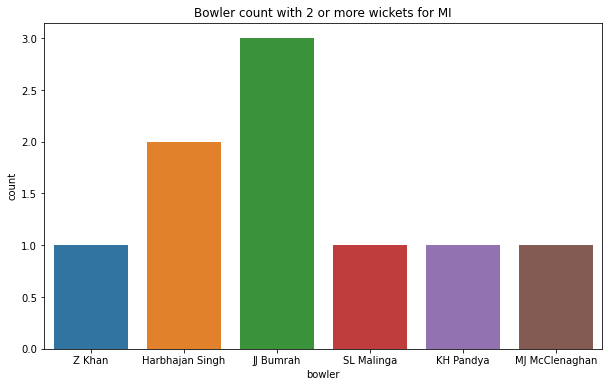

In [450]:
plt.figure(figsize = (10,6))
sns.countplot(condition["bowler"])
plt.title("Bowler count with 2 or more wickets for MI")

##### Other MI Bowlers

- Trent Boult(overall)

In [451]:
boult = matches[(matches["batting_team"]=="Royal Challengers Bangalore")&(matches["bowler"]=="TA Boult")]

In [452]:
boult_second = boult[boult["inning"]==2]

In [453]:
boult_wickets = pd.DataFrame(boult_second.groupby(["season","match_id","batting_team"])["dismissal_kind"].count())

boult_wickets.columns = ["wicket"]

print("Wickets taken by Boult against RCB overall: ")

boult_wickets

Wickets taken by Boult against RCB overall: 


wicket
season match_id batting_team                       
2018   7912     Royal Challengers Bangalore       1
       7938     Royal Challengers Bangalore       2

- Coulter Nile

In [454]:
coulter = matches[(matches["batting_team"]=="Royal Challengers Bangalore")&(matches["bowler"]=="NM Coulter-Nile")]

In [455]:
coulter_second = coulter[coulter["inning"]==2]

In [456]:
coulter_wickets = pd.DataFrame(coulter_second.groupby(["season","match_id","batting_team"])["dismissal_kind"].count())

coulter_wickets.columns = ["wicket"]

print("Wickets taken by Coulter Nile against RCB overall: ")

coulter_wickets

Wickets taken by Coulter Nile against RCB overall: 


,,,wicket
season,match_id,batting_team,
2015,543,Royal Challengers Bangalore,0
2017,27,Royal Challengers Bangalore,3


From all the above analysis of both the team's bowler inning wise we can predict that the frecuency of around two 1-2 bowlers of taking 2 or more wicket seems quite good . So wwe can predict that 1-2 bowler overall are expected for this match also.   

## Bowlers with economy rate less then 8 in the match

- Royal Challengers Bangalore

In [457]:
rcb = RCB_MI[RCB_MI["bowling_team"]=="Royal Challengers Bangalore"]
rcb = rcb[rcb["season"]!=2014]
rcb = rcb[(rcb["bye_runs"]==0) & (rcb["legbye_runs"]==0)]
rcb.iloc[:,4:].head()

,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
2713,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,Royal Challengers Bangalore,1,1,PA Patel,...,0,0,0,0,0,0,0,0,NaN,NaN
2714,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,Royal Challengers Bangalore,1,2,PA Patel,...,0,0,0,0,0,0,0,0,NaN,NaN
2715,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,Royal Challengers Bangalore,1,3,PA Patel,...,2,0,0,0,0,0,2,2,NaN,NaN
2716,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,Royal Challengers Bangalore,1,4,JC Buttler,...,0,0,0,0,0,0,0,0,NaN,NaN
2717,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,Royal Challengers Bangalore,1,5,JC Buttler,...,0,0,0,0,0,0,0,0,NaN,NaN


In [458]:
rcb.season.unique()

array([2017, 2015, 2016, 2018, 2019], dtype=int64)

In [459]:
economy = rcb.groupby(["season","match_id","bowler"]).agg({"batsman_runs":"sum","over" : 'nunique' , 'player_dismissed':'count'})

economy.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats for RCB Bowlers against MI :")

economy.tail(10)

Bowling stats for RCB Bowlers against MI :


runs given  over  wickets taken
season match_id bowler                                         
2019   11143    Mohammed Siraj          38     4              2
                N Saini                 40     4              0
                UT Yadav                26     4              2
                YS Chahal               38     4              4
       11322    M Ali                   18     4              2
                Mohammed Siraj          21     2              1
                N Saini                 34     3              0
                P Negi                  48     4              0
                UT Yadav                25     2              0
                YS Chahal               27     4              2

In [460]:
economy["economy rate"] = economy['runs given']/economy["over"]

print("Economy Rate of RCB Bowlers while bowling against MI :")

economy

Economy Rate of RCB Bowlers while bowling against MI :


runs given  over  wickets taken  \
season match_id bowler                                               
2015   534      AN Ahmed                   58     4              0   
                D Wiese                    32     4              4   
                Iqbal Abdulla              32     4              0   
                VR Aaron                   43     4              0   
                YS Chahal                  27     4              2   
       562      D Wiese                    37     4              0   
                HV Patel                   35     4              2   
                MA Starc                   40     4              1   
                S Aravind                  29     4              1   
                YS Chahal                  51     4              2   
2016   590      HV Patel                   20     2              0   
                Iqbal Abdulla              39     4              3   
                KW Richardson              26     3              1   
                SR Watson                  39     4              0   
                STR Binny                   8     1              0   
                VR Aaron                   36     4              0   
       617      CJ Jordan                  34     3              0   
                S Aravind                  23     4              1   
                SR Watson                  35     3              0   
                STR Binny                   2     1              0   
                VR Aaron                   33     4              2   
                YS Chahal                  16     4              1   
2017   12       P Negi                     26     2              0   
                S Aravind                  20     4              0   
                S Badree                    7     4              4   
                STR Binny                  13     2              1   
                TS Mills                   35     4              0   
                YS Chahal                  31     3              1   
       37       A Choudhary                31     4              1   
                AF Milne                   28     2              0   
                P Negi                     16     4              2   
                S Aravind                  21     2              0   
                SR Watson                  27     4              1   
                YS Chahal                  34     4              1   
2018   7907     CJ Anderson                46     4              2   
                CR Woakes                  31     3              1   
                Mohammed Siraj             34     4              0   
                UT Yadav                   36     4              2   
                Washington Sundar          32     2              0   
                YS Chahal                  32     3              0   
       7924     C de Grandhomme            27     3              0   
                Mohammed Siraj             28     4              2   
                TG Southee                 25     4              2   
                UT Yadav                   29     4              2   
                Washington Sundar          15     1              0   
                YS Chahal                  23     4              0   
2019   11143    C de Grandhomme            27     3              0   
                M Ali                      13     1              0   
                Mohammed Siraj             38     4              2   
                N Saini                    40     4              0   
                UT Yadav                   26     4              2   
                YS Chahal                  38     4              4   
       11322    M Ali                      18     4              2   
                Mohammed Siraj             21     2              1   
                N Saini                    34     3              0   
                P Negi                     48

- Over greater then 1 and economy less then 8

In [461]:
economy = economy[economy["over"]>1]

economy = economy[economy["economy rate"]<8]

economy.reset_index(inplace = True)

print("RCB Bowlers with economy rate less then 8: ")

economy

RCB Bowlers with economy rate less then 8: 


,season,match_id,bowler,runs given,over,wickets taken,economy rate
0,2015,534,YS Chahal,27,4,2,6.75
1,2015,562,S Aravind,29,4,1,7.25
2,2016,617,S Aravind,23,4,1,5.75
3,2016,617,YS Chahal,16,4,1,4.00
4,2017,12,S Aravind,20,4,0,5.00
5,2017,12,S Badree,7,4,4,1.75
6,2017,12,STR Binny,13,2,1,6.50
7,2017,37,A Choudhary,31,4,1,7.75
8,2017,37,P Negi,16,4,2,4.00
9,2017,37,SR Watson,27,4,1,6.75


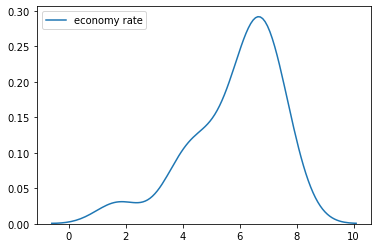

In [462]:
sns.kdeplot(economy["economy rate"])

Text(0.5, 1.0, 'RCB Bowlers with economy rate less then 8 ')

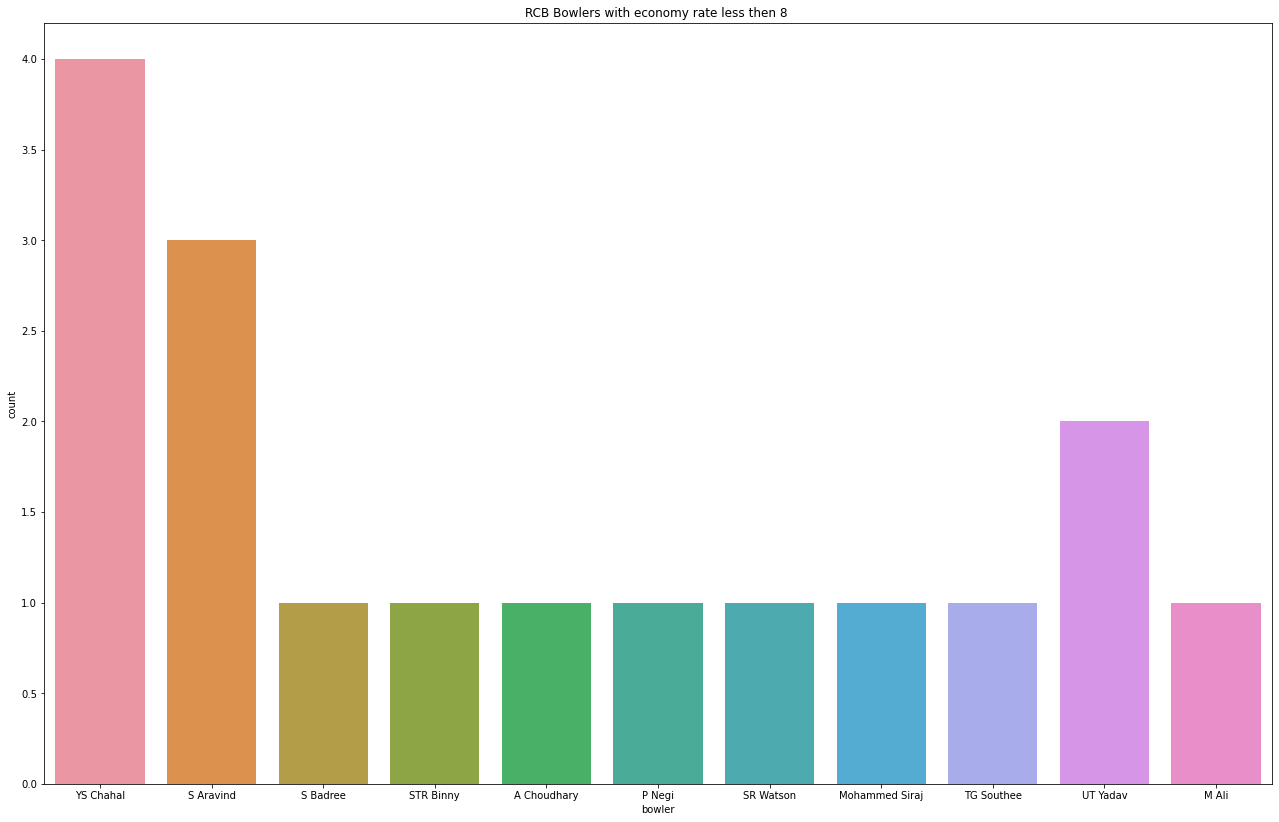

In [463]:
plt.figure(figsize = (22,14))
sns.countplot(economy["bowler"])
plt.title("RCB Bowlers with economy rate less then 8 ")

- Mumbai Indians

In [464]:
mi = RCB_MI[RCB_MI["bowling_team"]=="Mumbai Indians"]
mi = mi[mi["season"]!=2014]
mi = mi[(mi["bye_runs"]==0) & (mi["legbye_runs"]==0)]
mi.iloc[:,4:].head()

,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,ball,batsman,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
2589,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,Mumbai Indians,1,1,CH Gayle,...,0,0,0,0,0,1,0,1,NaN,NaN
2590,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,Mumbai Indians,1,2,V Kohli,...,1,0,0,0,0,0,1,1,NaN,NaN
2591,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,Mumbai Indians,1,3,V Kohli,...,0,0,0,0,0,1,0,1,NaN,NaN
2592,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,Mumbai Indians,1,4,CH Gayle,...,0,0,0,0,0,1,0,1,NaN,NaN
2593,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,Mumbai Indians,1,5,V Kohli,...,0,0,0,0,0,0,0,0,NaN,NaN


In [465]:
mi.season.unique()

array([2017, 2015, 2016, 2018, 2019], dtype=int64)

In [466]:
economy = mi.groupby(["season","match_id","bowler"]).agg({"batsman_runs":"sum","over" : 'nunique' , 'player_dismissed':'count'})

economy.columns = ['runs given' ,'over','wickets taken']

print("Bowling stats for MI Bowlers against RCB :")

economy.tail(10)

Bowling stats for MI Bowlers against RCB :


runs given  over  wickets taken
season match_id bowler                                         
2019   11143    KH Pandya               28     4              0
                M Markande              23     3              1
                MJ McClenaghan          24     2              0
                SL Malinga              47     4              0
       11322    HH Pandya               21     3              1
                J Behrendorff           49     4              1
                JJ Bumrah               22     4              0
                KH Pandya               10     1              0
                RD Chahar               31     4              0
                SL Malinga              30     4              4

In [467]:
economy["economy rate"] = economy['runs given']/economy["over"]

print("Economy Rate of MI Bowlers while bowling against RCB :")

economy

Economy Rate of MI Bowlers while bowling against RCB :


runs given  over  wickets taken  \
season match_id bowler                                               
2015   534      HH Pandya                  35     3              0   
                Harbhajan Singh            27     4              3   
                JJ Bumrah                  34     4              1   
                KA Pollard                  8     1              0   
                MJ McClenaghan             38     4              1   
                SL Malinga                 32     4              1   
       562      HH Pandya                  51     3              0   
                Harbhajan Singh            27     2              0   
                J Suchith                  35     3              0   
                JJ Bumrah                  50     4              0   
                MJ McClenaghan             39     4              0   
                SL Malinga                 26     4              1   
2016   590      HH Pandya                  18     2              0   
                Harbhajan Singh            18     2              0   
                JJ Bumrah                  30     4              3   
                KH Pandya                  19     4              2   
                MJ McClenaghan             46     4              1   
                TG Southee                 25     4              0   
       617      Harbhajan Singh            19     3              0   
                JJ Bumrah                  28     4              0   
                KA Pollard                 22     1              0   
                KH Pandya                  15     4              1   
                MJ McClenaghan             34     4              1   
                TG Southee                 26     4              1   
2017   12       HH Pandya                   9     2              1   
                Harbhajan Singh            23     4              0   
                JJ Bumrah                  38     4              0   
                KH Pandya                  21     4              1   
                MJ McClenaghan             19     4              2   
                TG Southee                 21     2              0   
       37       HH Pandya                   5     1              0   
                JJ Bumrah                  33     4              1   
                KH Pandya                  33     4              2   
                KV Sharma                  22     3              1   
                MJ McClenaghan             34     4              3   
                SL Malinga                 31     4              0   
2018   7907     HH Pandya                   4     1              0   
                JJ Bumrah                  28     4              2   
                KH Pandya                  28     4              2   
                M Markande                 25     4              1   
                MJ McClenaghan             24     3              2   
                Mustafizur Rahman          55     4              0   
       7924     HH Pandya                  28     3              3   
                JJ Bumrah                  22     4              1   
                JP Duminy                  28     2              0   
                KH Pandya                  24     4              0   
                M Markande                 28     3              1   
                MJ McClenaghan             34     4              1   
2019   11143    HH Pandya                  37     3              0   
                JJ Bumrah                  20     4              3   
                KH Pandya                  28     4              0   
                M Markande                 23     3              1   
                MJ McClenaghan             24     2              0   
                SL Malinga                 47     4              0   
       11322    HH Pandya                  21     3              1   
                J Behrendorff              49

- Over greater then 1 and economy rate less then 8

In [468]:
economy = economy[economy["over"]>1]

economy = economy[economy["economy rate"]<8]

economy.reset_index(inplace = True)

print("MI Bowlers with economy rate less then 8: ")

economy

MI Bowlers with economy rate less then 8: 


,season,match_id,bowler,runs given,over,wickets taken,economy rate
0,2015,534,Harbhajan Singh,27,4,3,6.750000
1,2015,562,SL Malinga,26,4,1,6.500000
2,2016,590,JJ Bumrah,30,4,3,7.500000
3,2016,590,KH Pandya,19,4,2,4.750000
4,2016,590,TG Southee,25,4,0,6.250000
5,2016,617,Harbhajan Singh,19,3,0,6.333333
6,2016,617,JJ Bumrah,28,4,0,7.000000
7,2016,617,KH Pandya,15,4,1,3.750000
8,2016,617,TG Southee,26,4,1,6.500000
9,2017,12,HH Pandya,9,2,1,4.500000


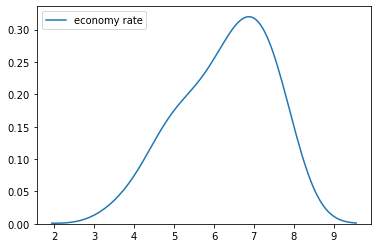

In [469]:
sns.kdeplot(economy["economy rate"])

Text(0.5, 1.0, 'MI Bowlers with economy rate less then 8')

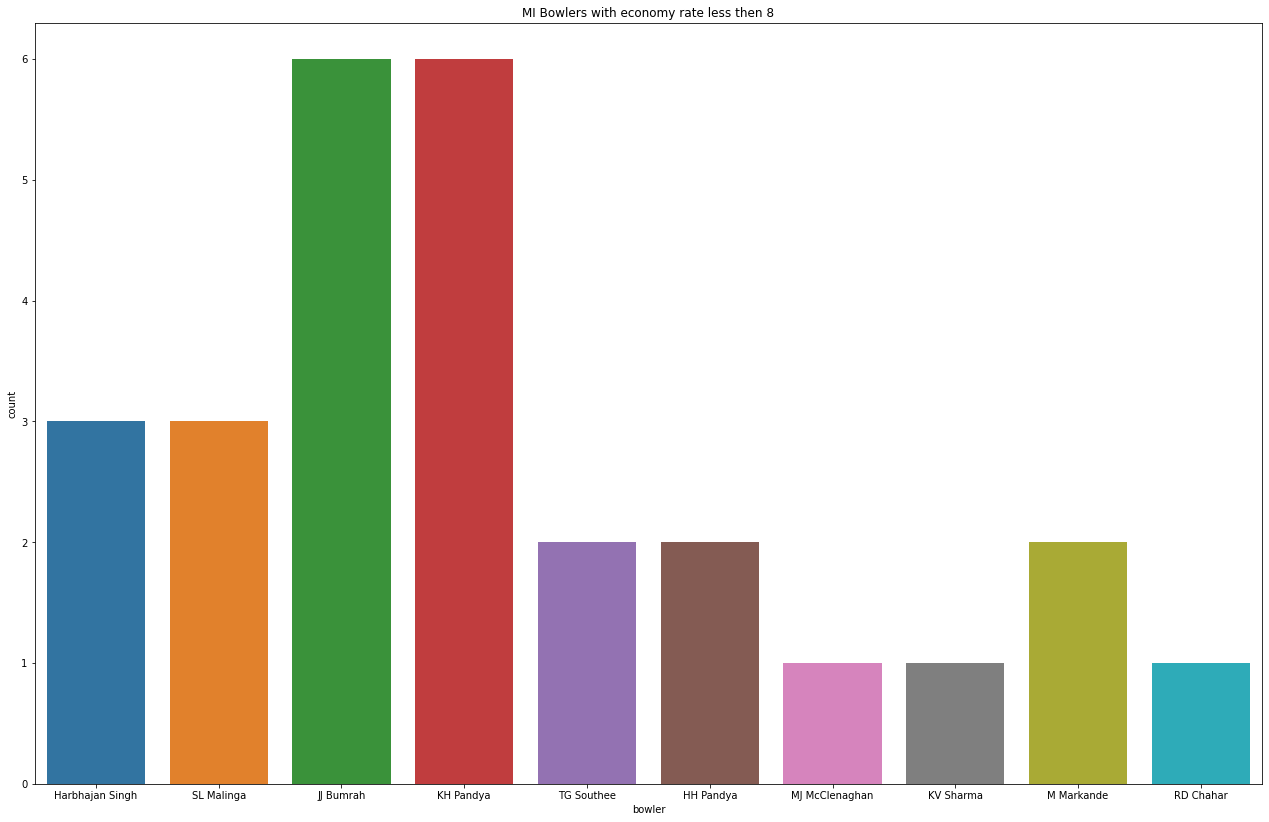

In [470]:
plt.figure(figsize = (22,14))
sns.countplot(economy["bowler"])
plt.title("MI Bowlers with economy rate less then 8")

From all the above analysis of bowler's from both the team, we can predict that 2-3 bowler have shown consistency over the years. So in this match also we expect around 2-3 bowlers can have economy less then 8.

## Batsman in the match with strike rate more then 130 and boundaries greater then 3

- Royal Challengers Bangalore

In [471]:
rcb = RCB_MI[(RCB_MI["batting_team"]=="Royal Challengers Bangalore")]

rcb = rcb[rcb["wide_runs"]==0]

rcb.iloc[41:,2:].head()

,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
2632,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,Mumbai Indians,7,...,0,0,0,0,0,0,0,0,NaN,NaN
2633,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,Mumbai Indians,8,...,0,0,0,0,0,0,0,0,NaN,NaN
2634,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,Mumbai Indians,8,...,0,0,0,0,0,0,0,0,NaN,NaN
2635,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,Mumbai Indians,8,...,0,0,0,0,0,1,0,1,NaN,NaN
2636,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,Mumbai Indians,8,...,0,0,0,0,0,1,0,1,NaN,NaN


In [472]:
strike = rcb.groupby(["season","match_id","batsman"]).agg({ "batsman_runs":"sum","ball" : 'count'})

print("Runs scored by RCB batsman against MI bowler :")

strike

Runs scored by RCB batsman against MI bowler :


batsman_runs  ball
season match_id batsman                           
2014   462      AB de Villiers            45    48
                NJ Maddinson              12     8
                PA Patel                  57    45
                V Kohli                    0     2
                Yuvraj Singh               0     2
...                                      ...   ...
2019   11322    MP Stoinis                 0     2
                P Negi                     0     2
                PA Patel                  31    20
                UT Yadav                   2     1
                V Kohli                    8     9

[89 rows x 2 columns]

In [473]:
strike["strike rate"] = (strike['batsman_runs']/strike["ball"]) * 100

print("Strike Rate of RCB Batsman against MI :")

strike

Strike Rate of RCB Batsman against MI :


batsman_runs  ball  strike rate
season match_id batsman                                        
2014   462      AB de Villiers            45    48    93.750000
                NJ Maddinson              12     8   150.000000
                PA Patel                  57    45   126.666667
                V Kohli                    0     2     0.000000
                Yuvraj Singh               0     2     0.000000
...                                      ...   ...          ...
2019   11322    MP Stoinis                 0     2     0.000000
                P Negi                     0     2     0.000000
                PA Patel                  31    20   155.000000
                UT Yadav                   2     1   200.000000
                V Kohli                    8     9    88.888889

[89 rows x 3 columns]

- Balls faced more then 10 and Strike rate greater then 130

In [474]:
strike = strike[strike["ball"]>10]

strike = strike[strike["strike rate"]>130]

strike.reset_index(inplace = True)

print("RCB Batsman who have played more then 10 balls and have strike rate greater then 130 :")

strike

RCB Batsman who have played more then 10 balls and have strike rate greater then 130 :


,season,match_id,batsman,batsman_runs,ball,strike rate
0,2014,484,CH Gayle,38,24,158.333333
1,2014,484,PA Patel,26,19,136.842105
2,2014,484,RR Rossouw,24,13,184.615385
3,2015,534,AB de Villiers,41,11,372.727273
4,2015,534,D Wiese,46,24,191.666667
5,2015,534,Iqbal Abdulla,20,15,133.333333
6,2015,534,KD Karthik,18,11,163.636364
7,2015,562,AB de Villiers,133,59,225.423729
8,2015,562,V Kohli,82,50,164.000000
9,2016,590,AB de Villiers,29,21,138.095238


Text(0, 0.5, 'Count')

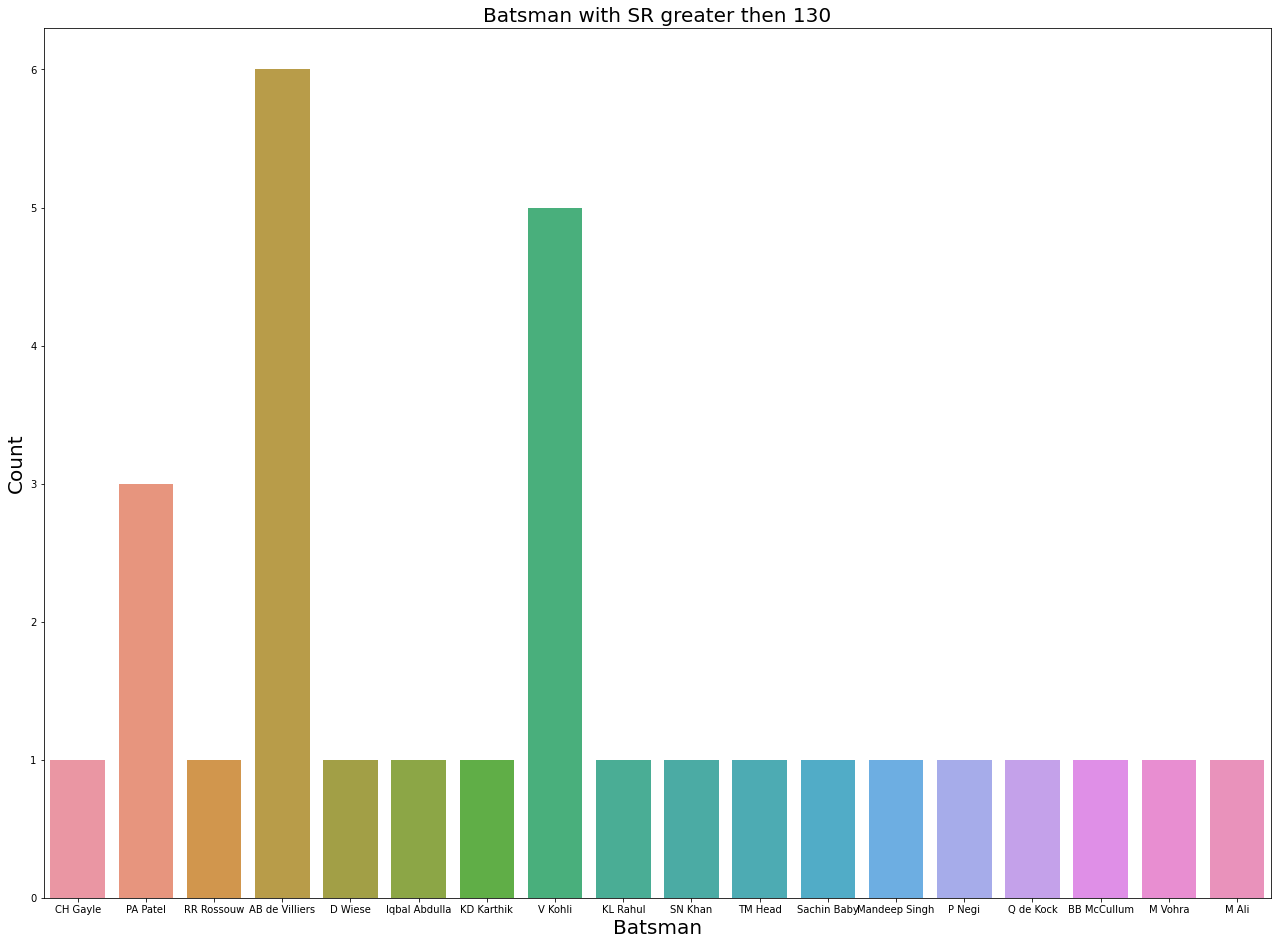

In [475]:
plt.figure(figsize = (22,16))
sns.countplot(strike["batsman"])
plt.title("Batsman with SR greater then 130",fontsize = 20)
plt.xlabel('Batsman',fontsize=20)
plt.ylabel('Count',fontsize=20)

- Mumbai Indians

In [476]:
mi = RCB_MI[(RCB_MI["batting_team"]=="Mumbai Indians")]

mi = mi[mi["wide_runs"]==0]

mi.iloc[41:,2:].head()

,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,bowling_team,over,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
2755,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,Royal Challengers Bangalore,7,...,0,0,0,0,0,1,0,1,NaN,NaN
2756,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,Royal Challengers Bangalore,8,...,0,0,0,0,0,0,0,0,NaN,NaN
2757,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,Royal Challengers Bangalore,8,...,0,0,0,0,0,0,0,0,NaN,NaN
2758,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,Royal Challengers Bangalore,8,...,0,0,0,0,0,0,0,0,NaN,NaN
2759,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,Royal Challengers Bangalore,8,...,0,0,0,0,0,1,0,1,NaN,NaN


In [477]:
strike = mi.groupby(["season","match_id","batsman"]).agg({ "batsman_runs":"sum","ball" : 'count'})

print("Runs scored by MI batsman against RCB bowlers :")

strike

Runs scored by MI batsman against RCB bowlers :


batsman_runs  ball
season match_id batsman                            
2014   462      AP Tare                    17    18
                AT Rayudu                  35    37
                CJ Anderson                18    19
                Harbhajan Singh             8     8
                JJ Bumrah                   1     1
...                                       ...   ...
2019   11322    HH Pandya                  37    16
                Ishan Kishan               21     9
                KH Pandya                  11    21
                Q de Kock                  40    26
                RG Sharma                  28    19

[92 rows x 2 columns]

In [478]:
strike["strike rate"] = (strike['batsman_runs']/strike["ball"]) * 100

print("Strike Rate of MI Batsman against RCB bowlers :")

strike

Strike Rate of MI Batsman against RCB bowlers :


batsman_runs  ball  strike rate
season match_id batsman                                         
2014   462      AP Tare                    17    18    94.444444
                AT Rayudu                  35    37    94.594595
                CJ Anderson                18    19    94.736842
                Harbhajan Singh             8     8   100.000000
                JJ Bumrah                   1     1   100.000000
...                                       ...   ...          ...
2019   11322    HH Pandya                  37    16   231.250000
                Ishan Kishan               21     9   233.333333
                KH Pandya                  11    21    52.380952
                Q de Kock                  40    26   153.846154
                RG Sharma                  28    19   147.368421

[92 rows x 3 columns]

- Balls faced more then 10 and Strike rate greater then 130

In [479]:
strike = strike[strike["ball"]>10]

strike = strike[strike["strike rate"]>130]

strike.reset_index(inplace = True)

print("MI Batsman who have played more then 10 balls and have strike rate greater then 130 :")

strike

MI Batsman who have played more then 10 balls and have strike rate greater then 130 :


,season,match_id,batsman,batsman_runs,ball,strike rate
0,2014,484,KA Pollard,43,30,143.333333
1,2014,484,RG Sharma,59,35,168.571429
2,2015,534,LMP Simmons,59,44,134.090909
3,2015,534,RG Sharma,42,15,280.000000
4,2015,534,UBT Chand,58,37,156.756757
5,2015,562,KA Pollard,49,24,204.166667
6,2015,562,LMP Simmons,68,52,130.769231
7,2015,562,PA Patel,19,11,172.727273
8,2016,590,AT Rayudu,31,23,134.782609
9,2016,590,JC Buttler,28,14,200.000000


Text(0, 0.5, 'Count')

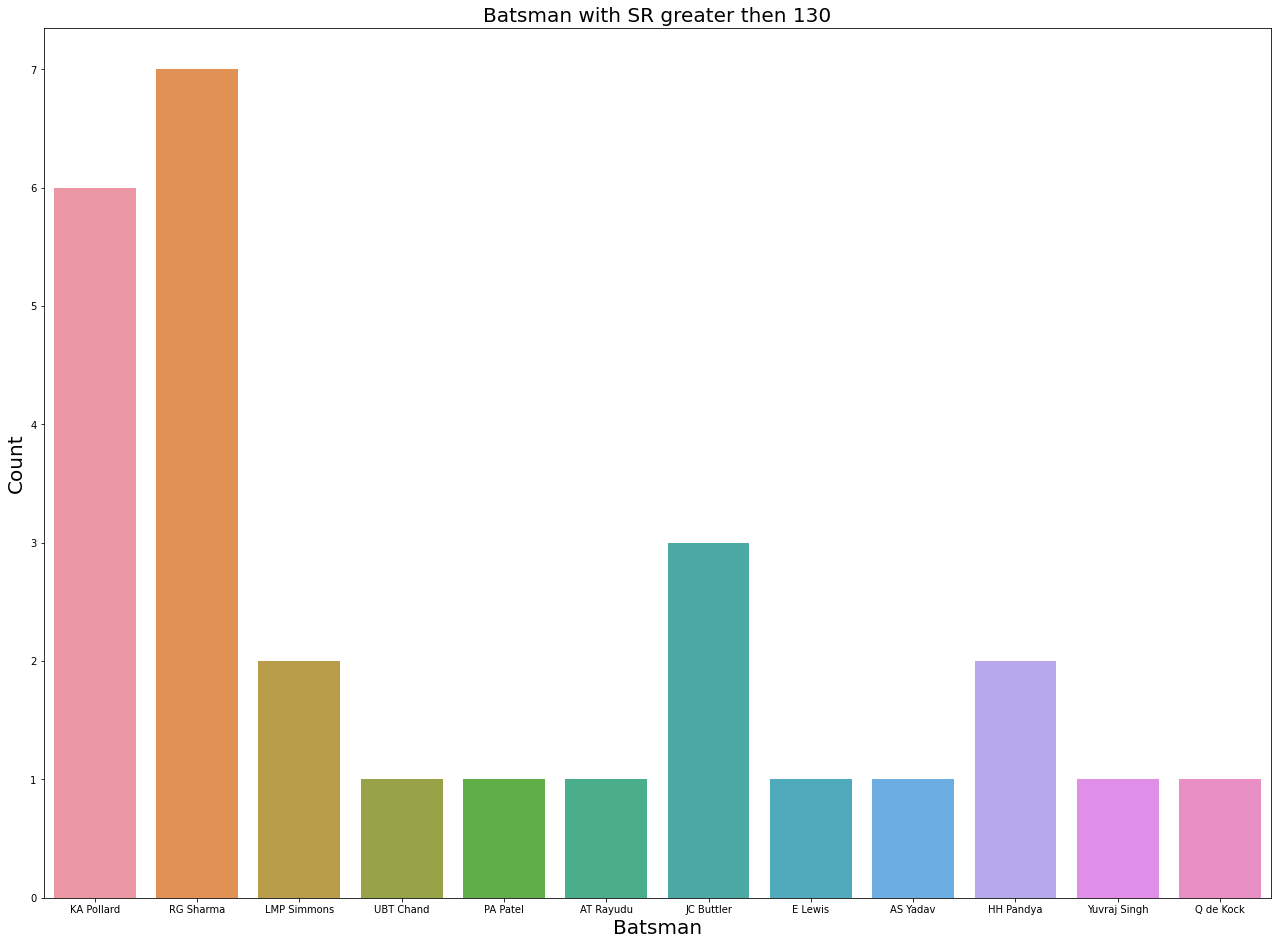

In [480]:
plt.figure(figsize = (22,16))
sns.countplot(strike["batsman"])
plt.title("Batsman with SR greater then 130",fontsize = 20)
plt.xlabel('Batsman',fontsize=20)
plt.ylabel('Count',fontsize=20)

From all the above analysis of batsman from both the team and considering that both the teams have hard hitters , we can predict that 3-5 batsman are expected to have strike rate and boundaries greater then 130 and 3 boundaries.

## Runs MI will score more/less then RCB in first 6 overs

In [481]:
overs = RCB_MI[RCB_MI["over"]<=6]

overs.over.unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

- Mumbai Indians first 6 over runs

In [482]:
mumbai = overs[overs["batting_team"]=="Mumbai Indians"]

mumbai.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
2713,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,...,0,0,0,0,0,0,0,0,NaN,NaN
2714,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,...,0,0,0,0,0,0,0,0,NaN,NaN
2715,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,...,2,0,0,0,0,0,2,2,NaN,NaN
2716,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,...,0,0,0,0,0,0,0,0,NaN,NaN
2717,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,2,Mumbai Indians,...,0,0,0,0,0,0,0,0,NaN,NaN


In [483]:
mumbai_runs = mumbai.groupby(["match_id"]).agg({"total_runs":"sum"})

mumbai_runs.columns = ["Mumbai Total Runs"]

mumbai_runs.reset_index(inplace = True)

print("Runs scored by MI overall :")

mumbai_runs

Runs scored by MI overall :


,match_id,Mumbai Total Runs
0,12,21
1,37,55
2,462,49
3,484,50
4,534,48
5,562,45
6,590,51
7,617,39
8,7907,71
9,7924,46


- RCB first 6 over runs

In [484]:
royal = overs[overs["batting_team"]=="Royal Challengers Bangalore"]

royal.head()

,match_id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,inning,batting_team,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
2589,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,...,0,0,0,0,0,1,0,1,NaN,NaN
2590,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,...,1,0,0,0,0,0,1,1,NaN,NaN
2591,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,...,0,0,0,0,0,1,0,1,NaN,NaN
2592,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,...,0,0,0,0,0,1,0,1,NaN,NaN
2593,12,2017,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,0,Mumbai Indians,1,Royal Challengers Bangalore,...,0,0,0,0,0,0,0,0,NaN,NaN


In [485]:
royal_runs = royal.groupby(["match_id"]).agg({"total_runs":"sum"})

royal_runs.columns = ["RCB Total Runs"]

royal_runs.reset_index(inplace = True)

print("Runs scored by RCB overall :")

royal_runs

Runs scored by RCB overall :


,match_id,RCB Total Runs
0,12,41
1,37,52
2,462,30
3,484,64
4,534,33
5,562,39
6,590,49
7,617,25
8,7907,57
9,7924,44


In [486]:
final = pd.merge(mumbai_runs,royal_runs,on = "match_id",how = "inner")

print("Both team's run in first 6 over:")
final

Both team's run in first 6 over:


,match_id,Mumbai Total Runs,RCB Total Runs
0,12,21,41
1,37,55,52
2,462,49,30
3,484,50,64
4,534,48,33
5,562,45,39
6,590,51,49
7,617,39,25
8,7907,71,57
9,7924,46,44


In [487]:
final["DIFF"] = abs(final["RCB Total Runs"]-final["Mumbai Total Runs"])

final

,match_id,Mumbai Total Runs,RCB Total Runs,DIFF
0,12,21,41,20
1,37,55,52,3
2,462,49,30,19
3,484,50,64,14
4,534,48,33,15
5,562,45,39,6
6,590,51,49,2
7,617,39,25,14
8,7907,71,57,14
9,7924,46,44,2


In [488]:
final.describe().iloc[:,3:].T

,count,mean,std,min,25%,50%,75%,max
DIFF,12.0,11.333333,6.813534,2.0,5.25,14.0,16.0,20.0


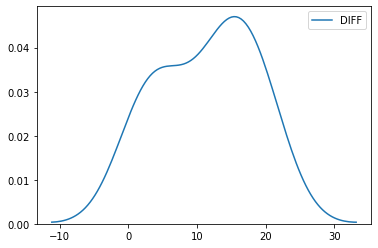

In [489]:
sns.kdeplot(final["DIFF"])

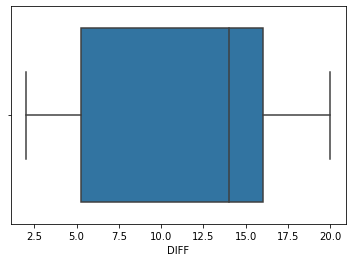

In [490]:
sns.boxplot(final["DIFF"])

Text(0.5, 1.0, 'Difference')

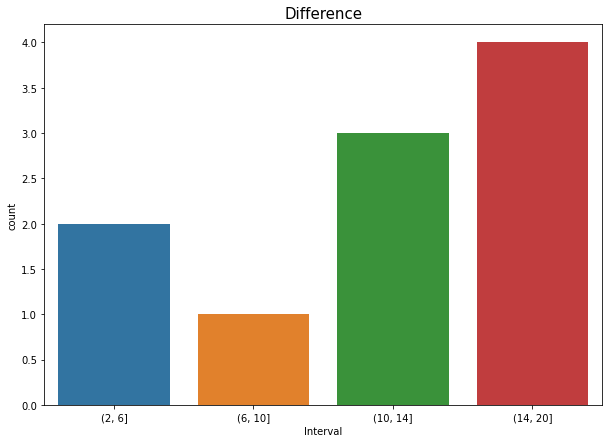

In [491]:
plt.figure(figsize=(10,7))
final["Interval"] = pd.cut(final["DIFF"],[2,6,10,14,20])
sns.countplot(final["Interval"])
plt.title("Difference",fontsize = 15)

In [492]:
print("Average difference of runs scored in first 6 overs :{}".format(round(final["DIFF"].mean())))

Average difference of runs scored in first 6 overs :11


From all the above analysis related to there past performance we can predict that 10+ runs difference is expected between the first 6 over runs of both the teams.